In [45]:
import matplotlib
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

matplotlib.interactive(True)

In [46]:
# Prepare dataset
dataset = load_wine()
target_names = dataset.target_names
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
# Evaluation with cross-validation
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

model_score = cross_validate(pipeline, X_train, y_train, return_train_score=True)
print("Train score : ",round(model_score["train_score"].mean(), 4))
print("Test score : ",round(model_score["test_score"].mean(), 4))

Train score :  1.0
Test score :  0.9775


In [48]:
# Comparison of different classifiers
classifiers = [
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier(max_iter=300, random_state=42)  
]

for classifier in classifiers:
    pipeline.set_params(model = classifier)
    model_score = cross_validate(pipeline, X_train, y_train)
    print(f"Score for {classifier} is {model_score['test_score'].mean():.4f}")

Score for DecisionTreeClassifier() is 0.9399
Score for SVC() is 0.9698
Score for KNeighborsClassifier() is 0.9479
Score for MLPClassifier(max_iter=300, random_state=42) is 0.9701


Best parameters: {'model__activation': 'logistic', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (100, 50), 'model__learning_rate': 'constant', 'model__learning_rate_init': 0.1, 'model__solver': 'adam'}
Best cross-validation score: 0.9925925925925926
Mean accuracy: 0.9778 F1 weighted: 0.9779


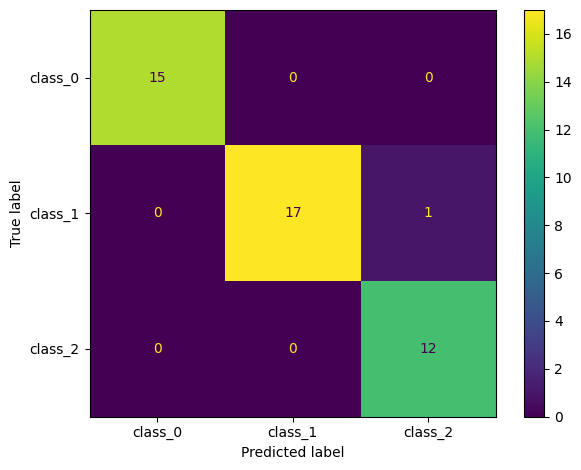

In [49]:
# Setting up hyperparameters
pipeline.set_params(model=MLPClassifier(max_iter=300, random_state=42))
params_grid = {
    "model__hidden_layer_sizes": [(100,), (150,), (200,), (100, 50), (150, 75)],  
    "model__activation": ['relu', 'tanh', 'logistic'],  
    "model__solver": ['adam', 'lbfgs', 'sgd'],  
    "model__alpha": [0.0001, 0.001, 0.01],  
    "model__learning_rate": ['constant', 'adaptive'],  
    "model__learning_rate_init": [0.001, 0.01, 0.1]  
}

# Search for optimal hyperparameters
grid_search_cv = GridSearchCV(pipeline, params_grid, cv=5, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

print("Best parameters:", grid_search_cv.best_params_)
print("Best cross-validation score:", grid_search_cv.best_score_)

# Evaluation of the results 
best_estimator: Pipeline = grid_search_cv.best_estimator_
y_predicted = best_estimator.predict(X_test)

class_mapping = np.vectorize(lambda value: target_names[value])
y_classes_predicted = class_mapping(y_predicted)
y_classes_test = class_mapping(y_test)

print(f"Mean accuracy: {np.mean(y_predicted == y_test):.4f}", 
      f"F1 weighted: {f1_score(y_test, y_predicted, average='weighted'):.4f}")

# Visualization of the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_classes_test, y_classes_predicted)
plt.tight_layout()
plt.show()